In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk  import sent_tokenize,word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import spacy
nlp=spacy.load('en_core_web_lg')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\negis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\negis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import tweepy as tw
import datetime as dt

begin_date=dt.date(2021,1,1)
end_date=dt.date.today()

#keys and access tokens
consumer_key=
consumer_secret=
access_token=
access_token_secret=

auth=tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tw.API(auth,wait_on_rate_limit=True)

In [3]:
searchword="#AMC"
date_since=dt.date(2021,1,1)

In [ ]:
#collect tweets

tweets=tw.Cursor(api.search,q=searchword,lang="en",since=date_since).items(1000)

In [ ]:
[tweet.text for tweet in tweets]

In [ ]:
for tweet in tweets:
    print(tweet.text)

In [ ]:
#remove retweets
new_search=searchword+"-filter:retweets"

In [ ]:
#collect tweets

tweets=tw.Cursor(api.search,q=new_search,lang="en",since=date_since).items(1000)

In [ ]:
[tweet.text for tweet in tweets]

In [ ]:
#collect tweets

tweets=tw.Cursor(api.search,q=searchword,lang="en",since=date_since).items(5)

user_loc=[[tweet.user.screen_name,tweet.user.location] for tweet in tweets]


In [ ]:
tweet_text=pd.DataFrame(data=user_loc,columns=['User','Location'])

In [9]:
#From specific User
user_tweets=api.user_timeline(screen_name="@SECGov",
                             count=200,
                             include_rts=False,
                             tweet_mode='extended')

In [12]:
all_tweet=[]
all_tweet.extend(user_tweets)
oldest_id=user_tweets[-1].id
while True:
    user_tweets=api.user_timeline(screen_name="@SECGov",
                             count=200,
                                  max_id=oldest_id-1,
                             include_rts=False,
                             tweet_mode='extended')
    if len(user_tweets)==0:
        break
    oldest_id=user_tweets[-1].id
    all_tweet.extend(user_tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweet)))

N of tweets downloaded till now 386
N of tweets downloaded till now 578
N of tweets downloaded till now 720
N of tweets downloaded till now 908
N of tweets downloaded till now 1091
N of tweets downloaded till now 1256
N of tweets downloaded till now 1430
N of tweets downloaded till now 1605
N of tweets downloaded till now 1772
N of tweets downloaded till now 1943
N of tweets downloaded till now 2125
N of tweets downloaded till now 2294
N of tweets downloaded till now 2480
N of tweets downloaded till now 2633
N of tweets downloaded till now 2801
N of tweets downloaded till now 2843


In [152]:
out_tweets=[[tweet.id_str,
            tweet.created_at,
            tweet.favorite_count,
            tweet.retweet_count,
            tweet.full_text.encode("utf-8").decode("utf-8")]
           for idx,tweet in enumerate(all_tweet)]
just_tweets=[[tweet.full_text.encode("utf-8").decode("utf-8")]
            for idx,tweet in enumerate(all_tweet)]
df=pd.DataFrame(out_tweets,columns=["id","created_at","favorite_count","retweet_count","Tweet"])
df

,id,created_at,favorite_count,retweet_count,Tweet
0,1418326349148786690,2021-07-22 21:45:27,264,71,Today we announced an emergency action involvi...
1,1418315807726227460,2021-07-22 21:03:34,106,27,‼️ Exciting Announcement ‼️\n\nYJ Fischer will...
2,1418278341988212738,2021-07-22 18:34:41,267,62,Today we announced an emergency action chargin...
3,1417943313706110976,2021-07-21 20:23:24,4,1,Thank you for joining us today! \n\nCheck back...
4,1417941427586273281,2021-07-21 20:15:55,352,61,Today we announced an award of nearly $3 milli...
...,...,...,...,...,...
2838,1002906454108573697,2018-06-02 13:35:06,8,4,Join us for Investing in America on June 13! O...
2839,1002561057561497602,2018-06-01 14:42:37,5,8,SEC charges 13 private fund advisers for repea...
2840,1002286268821143552,2018-05-31 20:30:42,3,5,Chyhe Becker Named Acting Chief Economist and ...
2841,1002272657440722945,2018-05-31 19:36:37,3,5,SEC Names Julie A. Erhardt Acting Chief Risk O...


In [155]:
sec_tweet=df[['Tweet']]
sec_tweet.info

<bound method DataFrame.info of                                                   Tweet
0     Today we announced an emergency action involvi...
1     ‼️ Exciting Announcement ‼️\n\nYJ Fischer will...
2     Today we announced an emergency action chargin...
3     Thank you for joining us today! \n\nCheck back...
4     Today we announced an award of nearly $3 milli...
...                                                 ...
2838  Join us for Investing in America on June 13! O...
2839  SEC charges 13 private fund advisers for repea...
2840  Chyhe Becker Named Acting Chief Economist and ...
2841  SEC Names Julie A. Erhardt Acting Chief Risk O...
2842  SEC charges investment banker in insider tradi...

[2843 rows x 1 columns]>

In [178]:
just_tweets
lines=list()
for items in just_tweets:
    word=''.join(items)
    new_word=word.split()
    for w in new_word:
        lines.append(w)
    
        


In [179]:
print(lines)

['Today', 'we', 'announced', 'an', 'emergency', 'action', 'involving', 'cycling', 'companies,', 'including', 'a', 'temporary', 'restraining', 'order', 'and', 'asset', 'freeze', 'to', 'stop', 'an', 'alleged', 'fraudulent', 'offering', 'of', 'securities', 'and', 'misappropriation', 'of', 'investor', 'assets.', 'Learn', 'more:', 'https://t.co/833bQSMkKR', 'https://t.co/4g7mXt4Ain', '‼️', 'Exciting', 'Announcement', '‼️', 'YJ', 'Fischer', 'will', 'join', 'the', 'SEC', 'as', 'Director', 'of', 'the', 'Office', 'of', 'International', 'Affairs!', 'We', 'are', 'all', 'thrilled', 'to', 'have', 'someone', 'with', "YJ's", 'depth', 'of', 'experience', 'in', 'international', 'affairs', 'leading', 'our', 'Office', 'of', 'International', 'Affairs.', 'More:', 'https://t.co/ImvCi9BsNA', 'https://t.co/ut4R7F1Dwf', 'Today', 'we', 'announced', 'an', 'emergency', 'action', 'charging', 'a', 'California', 'resident', 'with', 'running', 'microcap', 'fraud', 'schemes', 'targeting', 'retail', 'investors.', 'Read

In [181]:
#removing punctuations

lens=[re.sub(r'[^A-Za-z0-0]+','',x)for x in lines]

lines2=[]
for word in lines:
    if word !='':
        lines2.append(word)

In [187]:
#stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

#the snowball stemmer requires that you pass a language parameter
s_stemmer =SnowballStemmer(language='english')

stem=[]
for word in lines:
    stem.append(s_stemmer.stem(word))


['today',
 'we',
 'announc',
 'an',
 'emerg',
 'action',
 'involv',
 'cycl',
 'companies,',
 'includ',
 'a',
 'temporari',
 'restrain',
 'order',
 'and',
 'asset',
 'freez',
 'to',
 'stop',
 'an',
 'alleg',
 'fraudul',
 'offer',
 'of',
 'secur',
 'and',
 'misappropri',
 'of',
 'investor',
 'assets.',
 'learn',
 'more:',
 'https://t.co/833bqsmkkr',
 'https://t.co/4g7mxt4ain',
 '‼️',
 'excit',
 'announc',
 '‼️',
 'yj',
 'fischer',
 'will',
 'join',
 'the',
 'sec',
 'as',
 'director',
 'of',
 'the',
 'offic',
 'of',
 'intern',
 'affairs!',
 'we',
 'are',
 'all',
 'thrill',
 'to',
 'have',
 'someon',
 'with',
 'yj',
 'depth',
 'of',
 'experi',
 'in',
 'intern',
 'affair',
 'lead',
 'our',
 'offic',
 'of',
 'intern',
 'affairs.',
 'more:',
 'https://t.co/imvci9bsna',
 'https://t.co/ut4r7f1dwf',
 'today',
 'we',
 'announc',
 'an',
 'emerg',
 'action',
 'charg',
 'a',
 'california',
 'resid',
 'with',
 'run',
 'microcap',
 'fraud',
 'scheme',
 'target',
 'retail',
 'investors.',
 'read',
 'mo

In [190]:
#removing all stop words

stem2=[]

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
        
stem2

['today',
 'announc',
 'emerg',
 'action',
 'involv',
 'cycl',
 'companies,',
 'includ',
 'temporari',
 'restrain',
 'order',
 'asset',
 'freez',
 'stop',
 'alleg',
 'fraudul',
 'offer',
 'secur',
 'misappropri',
 'investor',
 'assets.',
 'learn',
 'more:',
 'https://t.co/833bqsmkkr',
 'https://t.co/4g7mxt4ain',
 '‼️',
 'excit',
 'announc',
 '‼️',
 'yj',
 'fischer',
 'join',
 'sec',
 'director',
 'offic',
 'intern',
 'affairs!',
 'thrill',
 'someon',
 'yj',
 'depth',
 'experi',
 'intern',
 'affair',
 'lead',
 'offic',
 'intern',
 'affairs.',
 'more:',
 'https://t.co/imvci9bsna',
 'https://t.co/ut4r7f1dwf',
 'today',
 'announc',
 'emerg',
 'action',
 'charg',
 'california',
 'resid',
 'run',
 'microcap',
 'fraud',
 'scheme',
 'target',
 'retail',
 'investors.',
 'read',
 'more:',
 'https://t.co/wyvdmvtro7',
 'https://t.co/7xfiiqfdii',
 'thank',
 'join',
 'today!',
 'check',
 'video',
 'record',
 'inform',
 'event',
 '#secsmallbiz',
 'team',
 'seri',
 'diversifi',
 'opportun',
 'ventur',

In [191]:
df=pd.DataFrame(stem2)
df=df[0].value_counts()

In [192]:
#this will give frequencies of our words
from nltk.probability import FreqDist

freqdoctor=FreqDist()

for words in df:
    freqdoctor[words]+=1
    
freqdoctor



FreqDist({1: 5733, 2: 1141, 3: 525, 4: 278, 5: 203, 6: 159, 7: 108, 8: 99, 9: 71, 10: 57, ...})

In [229]:
import matplotlib.pyplot as plt;plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds",color_codes=False)

c:\users\negis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


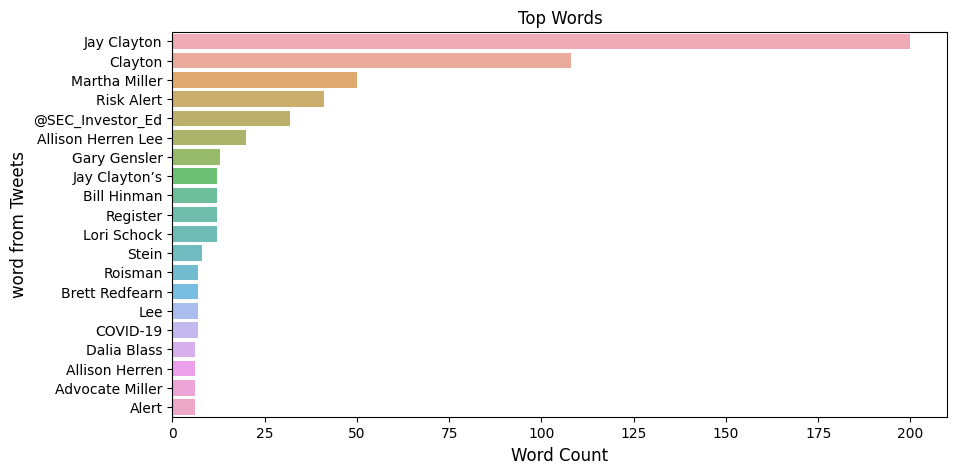

In [230]:
df=df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.8)
plt.title('Top Words')
plt.ylabel('word from Tweets',fontsize=12)
plt.xlabel('Word Count',fontsize=12)
plt.show()

In [200]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp=en_core_web_sm.load()



In [202]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+'-'+ent.label_+'-'+str(spacy.explain(ent.label_)))

In [211]:
str1=" "
stem2=str1.join(lines2)
stem2=nlp(stem2)
label=[(X.text,X.label_) for X in stem2.ents]
df6=pd.DataFrame(label,columns=['Word','Entity'])
df7=df6.where(df6['Entity']=='ORG')
print(df7)
df7=df7['Word'].value_counts()

                                                   Word Entity
0                                                   NaN    NaN
1                                                 Learn    ORG
2                                                   NaN    NaN
3                                                   SEC    ORG
4                   the Office of International Affairs    ORG
...                                                 ...    ...
6296  the Division of Economic and Risk Analysis htt...    ORG
6297                                                SEC    ORG
6298                                                NaN    NaN
6299                                                SEC    ORG
6300                                                NaN    NaN

[6301 rows x 2 columns]


c:\users\negis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\negis\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\negis\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128073 missing from current font.
  font.set_text(s, 0, flags=flags)


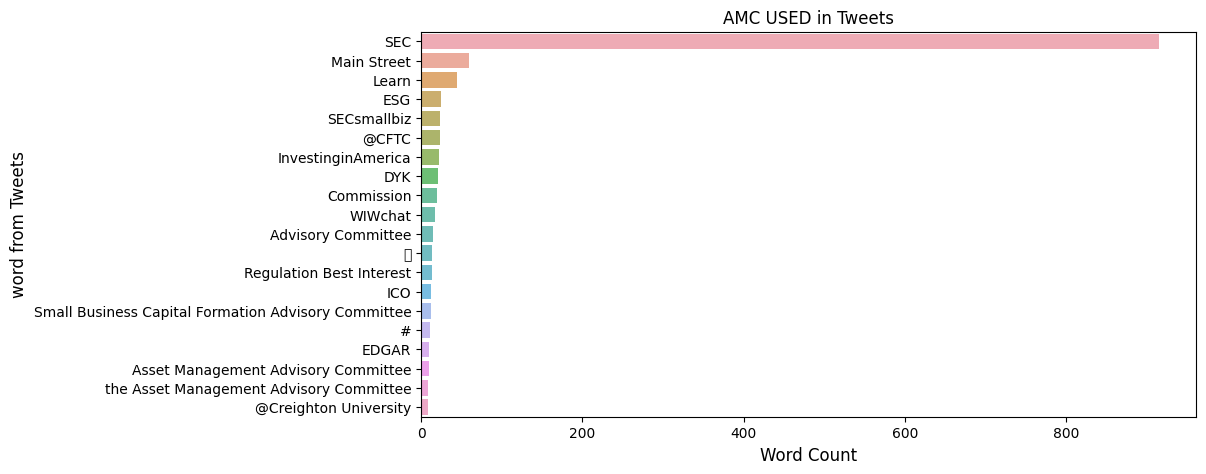

In [212]:
df=df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.8)
plt.title('AMC USED in Tweets')
plt.ylabel('word from Tweets',fontsize=12)
plt.xlabel('Word Count',fontsize=12)
plt.show()

In [213]:
str1=" "
stem2=str1.join(lines2)
stem2=nlp(stem2)
label=[(X.text,X.label_) for X in stem2.ents]
df6=pd.DataFrame(label,columns=['Word','Entity'])
df7=df6.where(df6['Entity']=='PERSON')
print(df7)
df7=df7['Word'].value_counts()

                         Word  Entity
0                         NaN     NaN
1                         NaN     NaN
2                         NaN     NaN
3                         NaN     NaN
4                         NaN     NaN
...                       ...     ...
6296                      NaN     NaN
6297                      NaN     NaN
6298         Julie A. Erhardt  PERSON
6299                      NaN     NaN
6300  https://t.co/pXWk5eZ52l  PERSON

[6301 rows x 2 columns]


c:\users\negis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


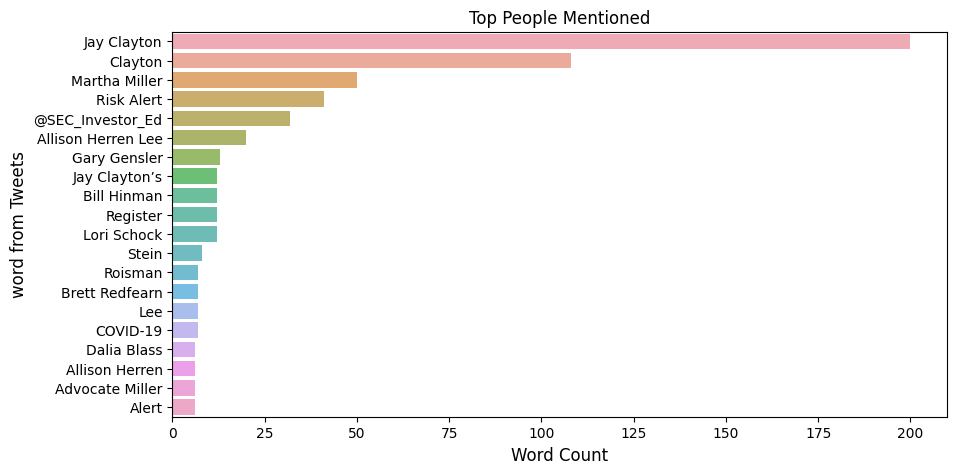

In [214]:
df=df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('word from Tweets',fontsize=12)
plt.xlabel('Word Count',fontsize=12)
plt.show()

In [ ]:
df=df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values,df.index,alpha=0.8)
plt.title('AMC USED in Tweets')
plt.ylabel('word from Tweets',fontsize=12)
plt.xlabel('Word Count',fontsize=12)
plt.show()

In [11]:
#latest 3 tweets
for info in user_tweets[:100]:
    print("ID:{}".format(info.id))
    print(info.created_at)
    print(info.full_text)
    print("\n")

ID:1418326349148786690
2021-07-22 21:45:27
Today we announced an emergency action involving cycling companies, including a temporary restraining order and asset freeze to stop an alleged fraudulent offering of securities and misappropriation of investor assets.

Learn more:

https://t.co/833bQSMkKR https://t.co/4g7mXt4Ain


ID:1418315807726227460
2021-07-22 21:03:34
‼️ Exciting Announcement ‼️

YJ Fischer will join the SEC as Director of the Office of International Affairs!

We are all thrilled to have someone with YJ's depth of experience in international affairs leading our Office of International Affairs.

More: https://t.co/ImvCi9BsNA https://t.co/ut4R7F1Dwf


ID:1418278341988212738
2021-07-22 18:34:41
Today we announced an emergency action charging a California resident with running microcap fraud schemes targeting retail investors.
 
Read more:  

https://t.co/wyVdmvTro7 https://t.co/7xfIiqFDii


ID:1417943313706110976
2021-07-21 20:23:24
Thank you for joining us today! 

Check b